# Exercise 1

Investment Recommendations for Stocks A and B
Quantitative Analysis at JP Morgan

As a quantitative analyst at JP Morgan, you have been tasked with studying the annual returns of two specific stocks, A and B, over the last 5 years. Your goal is to provide investment recommendations based on historical data.

| Year | Probability | A Share Annual Return | B Share Annual Return |
|------|-------------|-----------------------|-----------------------|
| 2016 | 20%         | 25%                   | 6%                    |
| 2017 | 20%         | -5%                   | 9%                    |
| 2018 | 20%         | 0%                    | 5%                    |
| 2019 | 20%         | -15%                  | -6%                   |
| 2020 | 20%         | 5%                    | -6%                   |

You base your projections on past performance, estimating the statistics (mean, standard deviation, etc.) on A and B shares using historical returns and assuming that these statistics are relevant for future years.


## Q1

**Calculate the mean and variance of A and B**

This is just checking if you remember the mean and variance formulas:

$$\begin{align} \mathbb E[X] = \mu_x &= \sum_i p(x_i) x_i \\
                    \mathbb E[(X - \mathbb E[X])^2] = \sigma^2_x &= \sum_i p(x_i) x_i^2 - \mu_x^2 \end{align}$$

In [1]:
import pandas as pd
q1_data = {
    'Year': [2016, 2017, 2018, 2019, 2020],
    'p': [0.20, 0.20, 0.20, 0.20, 0.20],
    'r_A': [0.25, -0.05, 0.00, -0.15, 0.05],
    'r_B': [0.06, 0.09, 0.05, -0.06, -0.06]
}

q1_df = pd.DataFrame(q1_data).set_index('Year')
mu_A = (q1_df.p * q1_df.r_A).sum()
mu_B = (q1_df.p * q1_df.r_B).sum()
sigma2_A = (q1_df.p * q1_df.r_A ** 2).sum() - mu_A ** 2
sigma2_B = (q1_df.p * q1_df.r_B ** 2).sum() - mu_B ** 2

names = ['μ_A', 'μ_B', 'σ2_A', 'σ2_B']
values = [mu_A, mu_B, sigma2_A, sigma2_B]
for name, value in zip(names, values):
    print(f'{name} = {value:0.6f}')

μ_A = 0.020000
μ_B = 0.016000
σ2_A = 0.017600
σ2_B = 0.004024


## Q2
**Consider a rational risk-averse investor. Which stock (if any) does he prefer according to the mean-variance criterion?**

Recall that the mean-variance utility is given by:

$$U(x) = \mu_x - \frac{A}{2} \sigma_x^2$$

The only wrinkle is that we don't know A. We can make an inequality to find the value of A for which we prefer A to B:

$$\begin{align}
U(A) &\ge U(B) \\
\mu_A - \frac{A}{2} \sigma_A^2 &\ge \mu_B - \frac{A}{2} \sigma_B^2 \\
\mu_A - \mu_B &\ge \frac{A}{2}\sigma_A^2 - \frac{A}{2}\sigma_B^2 \\
\mu_A - \mu_B &\ge \frac{A}{2} (\sigma_A^2 - \sigma_B^2) \\
2 (\mu_A - \mu_B) &\ge A (\sigma_A^2 - \sigma_B^2) \\
\end{align}
$$

Here we've almost isolated $A$, but we have to be careful, because if $\sigma_A^2 - \sigma_B^2$ is negative we have to flip the sign of the inequality when we divide. So I'll plug in the numbers here:

$$\begin{align} 2(0.0200 - 0.016) &\ge A(0.0176 - 0.004) \\
2 \frac{0.004}{0.0136} \ge A \\
A \le 0.5893 \end{align}$$

So as long as $A \le 0.5892$, inverstors will prefer asset A.

In [2]:
prefer_A_threshold = 2 * (mu_A - mu_B) / (sigma2_A - sigma2_B)
prefer_A_threshold

0.5892751915144377

We can look at the sitution graphically by plotting utility against values of A.

Interpretation: Asset A has high returns but high variance. Evidently, the variance isn't "worth it" to all but the most risk-neutral/risk-seeking investors. For anyone with a higher risk tolernace than 0.589, B is preferred. Since we have no empirical data about the distribution of $A$ in the population, we can't say if 0.589 is "high" or "low", though

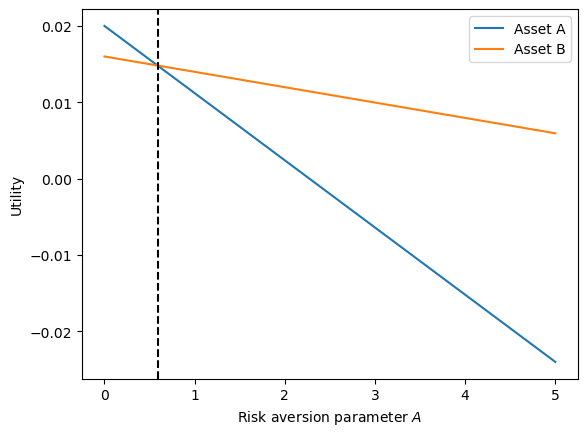

In [3]:
import matplotlib.pyplot as plt
import numpy as np

A_grid = np.linspace(0, 5, 100)
U_A = mu_A - A_grid / 2 * sigma2_A
U_B = mu_B - A_grid / 2 * sigma2_B

fig, ax = plt.subplots()
ax.plot(A_grid, U_A, label='Asset A')
ax.plot(A_grid, U_B, label='Asset B')
ax.axvline(prefer_A_threshold, ls='--', c='k')
ax.set(xlabel=r'Risk aversion parameter $A$', ylabel='Utility')
ax.legend()
plt.show()

## Q3

**You want to construct a portfolio consisting of A and B shares. This portfolio consists of $x_A$ A shares and $x_B$ B shares. Determine the mean and variance of the portfolio as a function of the weights $x_A$ and $x_B$.**

Recall the rules for shift and scaling a random variable. Given a random variable $X$ with mean $\mu_X$ and variance $\sigma^2_X$, a random variable $Z = aX + b$ will have:

$$\begin{align}
\mu_Z &= a\mu_X + b \\
\sigma_Z^2 &= a^2 \sigma_Z^2 
\end{align}
$$

Furthermore, a random varible $Z$ formed from the convolution of two random varibles $X$, with moments $\mu_X$ and $\sigma^2_X$ and $Y$, with moments $\mu_Y$ and $\sigma^2_Y$, such that $Z = X + Y$, will have:

$$\begin{align}
\mu_Z &= \mu_X + \mu_Y \\
\sigma^2_Z &= \sigma^2_X + \sigma^2_Y + 2 \sigma_{X,Y} \end{align}$$

Where $\sigma_{X,Y}$ is the covariance between the two variables.

Putting these facts together, we derive an expression for the new random variable $r_p = x_A r_A + x_B r_B$:

$$\begin{align}
\mu_p &= x_A \mu_A + x_B \mu_B \\
\sigma^2_p &= x_A^2 \sigma^2_A + x_B^2 \sigma^2_B + 2 x_A x_B \sigma_{A,B}
\end{align}$$

We know everything except $\sigma_{A,B}$, which can be computed from the data using the formula:

$$\sigma_{A,B} = \text{Cov}(A, B) = \mathbb E[(A - \mathbb E[A])(B - \mathbb E[B])]$$

In [4]:
sigma_AB = (q1_df.p * ((q1_df.r_A - mu_A) * (q1_df.r_B - mu_B))).sum()
print(f'Cov(A, B) = {sigma_AB:0.4f}')

Cov(A, B) = 0.0030


**Important note!**

During the test, we announced that you could consider $\rho_{A,B}$ to be zero. This was not correct (you can compute the true $\rho_{A,B}$ from the data), but if you followed our announcement, you can use the following fact:

$$\sigma_{A,B} = \rho_{A,B} \sigma_A \sigma_B = 0$$

In which case the portfolio variance simplifies to:

$$\sigma_p = x_A^2 \sigma^2_A + x_B^2 \sigma^2_B$$



# Q4

**What should the portfolio composition be if you want to obtain a minimum variance**

To minimize the variance, set up a minimization program:

$$\min_{x_A, x_B} \sigma_p^2 = x_A^2 \sigma^2_A + x_B^2 \sigma^2_B + 2 x_A x_B \sigma_{A,B},\quad s.t. x_A + x_B = 1$$

We need to add the constraint that $x_A + x_B = 1$ or else they won't be weights! Also if we can choose $x_A$ and $x_B$ freely without this constraint, it should be easy to see that the minimum variance solution is $x_A = 0, x_B = 0$ and $\sigma^2_p = 0$. If you don't invest, you live risk free!

Anyway, now that we have a constraint, you have a choice: do a constrained optimization (boo) or substitute the constraint into the objective to eliminate it (yay!). I will do the 2nd by solving the constraint for $x_B = 1 - x_A$, then modifying the objective:

$$\min_{x_A} \sigma_p^2 = x_A^2 \sigma^2_A + (1 - x_A)^2 \sigma^2_B + 2 x_A (1 - x_A) \sigma_{A,B}$$

Get take derivatives to a first-order condition. Before I do I'll expand all the multiplications to make the derivatives more obvious:

$$\min_{x_A} \sigma_p^2 = x_A^2 \sigma^2_A + (1 - 2 x_A + x_A^2) \sigma^2_B + 2 (x_A - x_A^2) \sigma_{A,B}$$

$$\begin{align}
\frac{\partial \sigma_p^2}{x_A} = 0 &\implies 2x_A\sigma^2_A - 2 \sigma_B^2  + 2 x_A \sigma_B^2 + 2 \sigma_{A,B} - 4 x_A \sigma_{A,B} &= 0 \\
\end{align}$$

Now just solve for $x_A$:

$$\begin{align}
2x_A\sigma^2_A - 2 \sigma_B^2  + 2 x_A \sigma_B^2 + 2 \sigma_{A,B} - 4 x_A \sigma_{A,B} &= 0 \\
x_A\sigma^2_A - \sigma_B^2  + x_A \sigma_B^2 + \sigma_{A,B} - 2 x_A \sigma_{A,B} &= 0 \\
x_A\sigma^2_A + x_A \sigma_B^2 - 2 x_A \sigma_{A,B} &= \sigma_B^2 - \sigma_{A,B} \\
x_A = \frac{\sigma_B^2 - \sigma_{A,B}}{\sigma^2_A + \sigma_B^2 - 2 \sigma_{A,B}}
\end{align}$$

And we know from that constraint that $x_B = 1 - x_A$.

### Solution 1: You did it the right way

In [5]:
x_A1 = (sigma2_B - sigma_AB) / (sigma2_A + sigma2_B - 2 * sigma_AB)
x_B1 = 1 - x_A1

print(f'xA = {x_A1:0.4f}')
print(f'xB = {x_B1:0.4f}')

xA = 0.0666
xB = 0.9334


### Solution 2: You listened to the foolish TAs during the test

In [6]:
x_A2 = (sigma2_B - 0) / (sigma2_A + sigma2_B - 2 * 0)
x_B2 = 1 - x_A2

print(f'xA = {x_A2:0.4f}')
print(f'xB = {x_B2:0.4f}')

xA = 0.1861
xB = 0.8139


Both solutions were given full marks obviously.

# Exercise 2

The annual returns of the two portfolios "Dynamic" and "Conservative" and their respective probabilities according to specific conditions are as follows:

| State        | Conservative | Dynamic | Probability |
|-------------|--------------|---------|-------------|
| Recession   | -0.01         | -0.05   | 0.10        |
| Recovery    | 0.01          | 0.02    | 0.40        |
| Growth      | 0.02          | 0.04    | 0.40        |
| Euphoria    | 0.05          | 0.07    | 0.10        |


In [7]:
q2_data = {
    'Conservative': [-0.01, 0.01, 0.02, 0.05],
    'Dynamic': [-0.05, 0.02, 0.04, 0.07],
}
index = ['Recession', 'Recovery', 'Growth', 'Euphoria']
q2_df = pd.DataFrame(q2_data, index=index)
q2_p = np.array([0.10, 0.40, 0.40, 0.10])

## Q1

**Calculate the mean, variance and standard deviation of these 2 assets. Give the formula for Skewness and Kurtosis (no calculation required). Explain investors' preferences for the skewness and kurtosis of a portfolio. What does a leptokurtic distribution suggest about the risk/return of an asset?**

First the calculations:

In [8]:
mu = (q2_df * q2_p[:, None]).sum(axis=0)
print('Portfolio means')
print(mu.to_string())

Portfolio means
Conservative    0.016
Dynamic         0.026


In [9]:
sigma2 = (q2_df.pow(2) * q2_p[:, None]).sum(axis=0) - mu ** 2
print('Portfolio variances:')
print(sigma2.to_string())
print('\n')
print('Portfolio standard deviations:')
print(sigma2.pow(0.5).to_string())

Portfolio variances:
Conservative    0.000204
Dynamic         0.000864


Portfolio standard deviations:
Conservative    0.014283
Dynamic         0.029394


For the skew and kurtosis we just have to remember that the moment generating function for $m > 2$ is:

$$F_m(X) = \mathbb E \left [ \left ( \frac{X - \mathbb E[X]}{\sqrt{\text{Var}(X))}} \right )^m \right ]$$

Which looks horrible, but it's just the expectation of the random variable, centered and scaled, raised to the $m$ power.

The question doesn't ask you to compute these moments, but here they are anyway:

In [10]:
df_norm = (q2_df - mu) / sigma2.pow(0.5)
skew = (q2_p[:, None] * df_norm.pow(3)).sum()
kurt = (q2_p[:, None] * df_norm.pow(4)).sum()


In [11]:
skew

Conservative    0.724851
Dynamic        -1.353267
dtype: float64

In [12]:
kurt

Conservative    4.324106
Dynamic         4.992541
dtype: float64

Finally we have the vocabulary quiz. **Leptokurtic** means there is excess kurtosis -- that is, more kurtosis than a Normal distribution. A normal distribution has a kurtosis of 3. So a Leptokurtic has "super risk". Risk-averse investors are going to charge a very high risk premium to hold these "fat tailed" assets, because the risk of very disasterous outcomes is much higher than in the normal (distribution) case.

## Q2

**Assuming that investors have a mean-variance utility function and the following risk aversion coefficients, which portfolio would you recommend to each of them? Please comment**

|       | Joe | Donald |
|-------|-----|--------|
| **A** | 100 | 10     |

First, compute a table of utilities and investors. We use the usual formula:

$$U_i = \mu_p - \frac{A_i}{2} \sigma_p^2$$

Where the index $i$ goes over the investors, and the index $p$ goes over the portfolios.

In [13]:
scale = 1
A_values = np.array([100, 10])
U = mu.mul(scale).values[:, None] - A_values[None] / 2 * sigma2.mul(scale ** 2).values[:, None]
U = pd.DataFrame(U, index=['Conservative', 'Dynamic'], columns=['Joe', 'Donald'])

We see that Sleepy Joe prefers the conservative portfoio, while the Donald prefers the dynamic portfolio. It's such a great portfolio, you wouldn't believe it. Really, just tremendous.

In [14]:
U

,Joe,Donald
Conservative,0.0058,0.01498
Dynamic,-0.0172,0.02168


## Q3

**Classify the 2 portfolios according to the first-order stochastic dominance criterion and, if necessary, according to the second-order stochastic dominance criterion**

To answer this question we need to compute the CDF of each portfolio. First we make an index of all possible returns we observe:

In [15]:
conservative_df = q2_df['Conservative'].reset_index(drop=True).to_frame().rename(columns={'Conservative':'returns'}).assign(conservative = q2_p).set_index('returns')
dynamic_df = q2_df['Dynamic'].reset_index(drop=True).to_frame().rename(columns={'Dynamic':'returns'}).assign(dynamic = q2_p).set_index('returns')
cdf_table = conservative_df.join(dynamic_df, how='outer').fillna(0)
cdf_table.rename(columns = lambda x: f'p({x})', inplace=True)
cdf_table = cdf_table.join(conservative_df.join(dynamic_df, how='outer').fillna(0).cumsum(axis=0).rename(columns=lambda x: f'F({x})'))

cdf_table['F(dyn) - F(con)'] = cdf_table['F(dynamic)'] - cdf_table[f'F(conservative)'] 
cdf_table['cum(F(dyn) - F(con))'] = cdf_table['F(dyn) - F(con)'].cumsum()
cdf_table

,p(conservative),p(dynamic),F(conservative),F(dynamic),F(dyn) - F(con),cum(F(dyn) - F(con))
returns,,,,,,
-0.05,0.0,0.1,0.0,0.1,0.1,0.1
-0.01,0.1,0.0,0.1,0.1,0.0,0.1
0.01,0.4,0.0,0.5,0.1,-0.4,-0.3
0.02,0.4,0.4,0.9,0.5,-0.4,-0.7
0.04,0.0,0.4,0.9,0.9,0.0,-0.7
0.05,0.1,0.0,1.0,0.9,-0.1,-0.8
0.07,0.0,0.1,1.0,1.0,0.0,-0.8


Then make the plot and check if one CDF is strictly to the right ("below") the other

<Axes: xlabel='returns'>

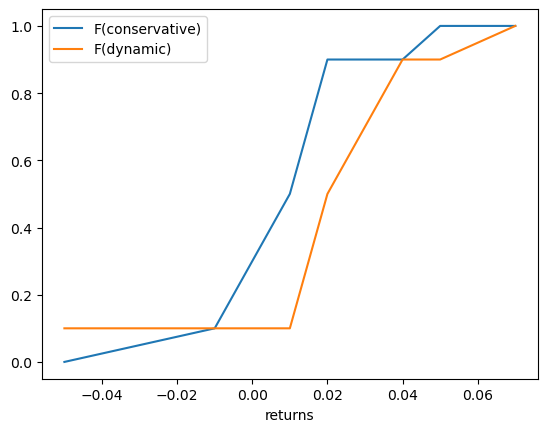

In [32]:
cdf_table[['F(conservative)', 'F(dynamic)']].plot()

There is no dominance at the 1st order, so we check at the 2nd order. To do this, we take the difference of the two CDFs, compute the cumulative sum, then check if the resulting series is strictly positive or negative.

The graph crosses 0, so there is no dominance at the 2nd order either.

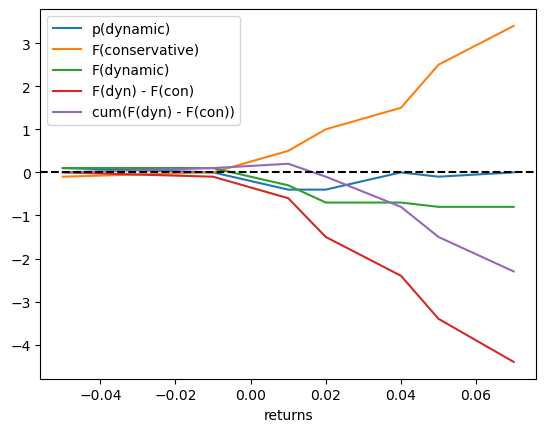

In [17]:
fig, ax = plt.subplots()
cdf_table[['F(conservative)', 'F(dynamic)']].plot()
ax.axhline(0, ls='--', c='k')
plt.show()

# Exercise 3

It is assumed that the European index has an annualised expected return of 8% and a standard deviation of 15%. The risk-free rate is 1.5%. You manage a pension plan with initial assets under management of €500 million. Each year you need to generate €25 million to pay pensions. Over the long term, you must not reduce the initial capital of 500 million euros. The annual amount of €25 million must be paid in all at once.

In [18]:
# Extract the pertinant information from the question
mu = 0.08 # Expected return
sigma = 0.15 # standard deviation
rf = 0.015 # risk-free rate
W0 = 500 # initial wealth
target = 25 # required profit

**How do you divide the wealth between the risk-free asset and the market portfolio to ensure, on average, the necessary payment? What is the risk associated with this portfolio?**

First, figure out what we need in terms of a return:

In [19]:
target_return = target / W0
print(f'To generate {target} million euros, we need a return of {target_return:0.4f}')

To generate 25 million euros, we need a return of 0.0500


Next we need to compute portfolio weights to achieve this return. We compute:

$$\mu^\star = w \mu + (1 - w) r_f$$

Then with $w$ in hand, we can compute the risk as:

$$\sigma_p = \sqrt{w^2 \sigma^2} = w \sigma$$

Anyway, solve for $w$ from the first equation:

$$\begin{align}
\mu^\star &= w \mu + (1 - w) r_f
\mu^\star - r_f &= w \mu - w r_f \\
w &= \frac{\mu^\star - r_f}{\mu - r_f} \end{align}$$

In [20]:
w_target = (target_return - rf) / (mu - rf)
print(f'Weight on risky asset that delivers {target_return:0.2%} returns: {w_target:0.4f}')

Weight on risky asset that delivers 5.00% returns: 0.5385


Numerically check that we generate 25 million euros with the computed portfolio:

In [21]:
(w_target * mu + (1 - w_target) * rf) * W0 == target

True

Compute the risk:

In [22]:
sigma_p = w_target * sigma
print(f'Volatility of the target portfolio: {sigma_p:0.4f}')

Volatility of the target portfolio: 0.0808


## Q2

**Assuming that the return on the portfolio follows a Gaussian distribution, what is the probability that the return on your portfolio will be negative? How many years would you expect to have a negative return?**

Graphically, we're looking for this red area:

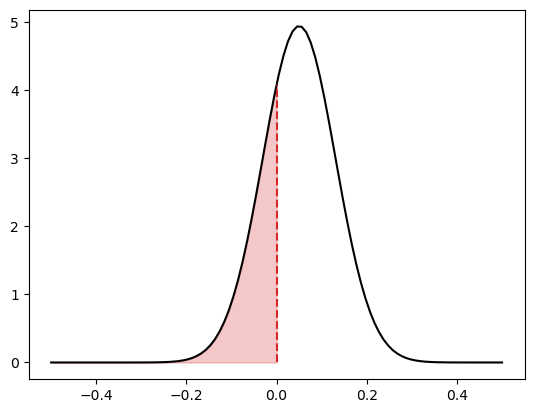

In [23]:
from scipy import stats
d = stats.norm(loc=target_return, scale=sigma_p)
x_grid = np.linspace(-0.5, 0.5, 100)

fig, ax = plt.subplots()
ax.plot(x_grid, d.pdf(x_grid), c='k')

p_neg = d.cdf(0)
neg_grid = np.linspace(-0.5, 0, 100)
ax.fill_between(neg_grid, 0, d.pdf(neg_grid), color='tab:red', alpha=0.25)
ax.vlines(0, 0, d.pdf(0), color='tab:red', ls='--')
plt.show()

We don't know the CDF of this distribution, so we have to go into the standard world and look up the z-score there. What z-score to look up? We want $x=0$, so first we have to compute:

$$z = \frac{x - \mu}{\sigma} = \frac{0 - 0.05}{0.0808} = -0.619$$

We're not allowed to look up negative numbers, so we have to do the flipty-flopty trick. First go to the trusty z-table and look up 0.619:

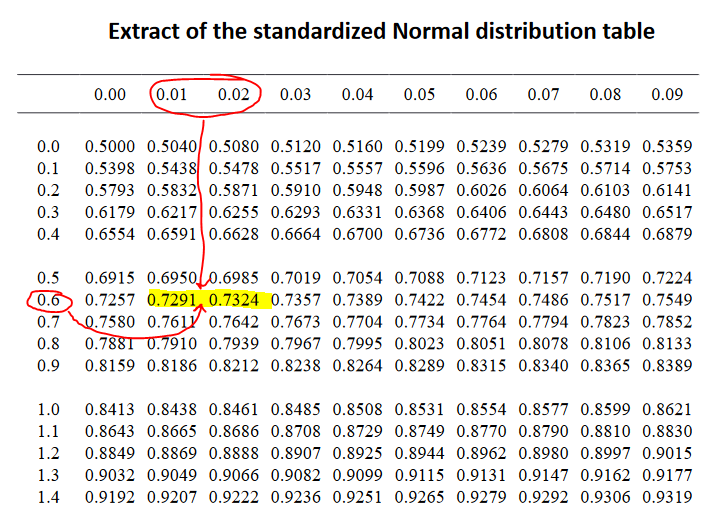

Evidently it's between 0.7291 and 0.7324. If we want to be ultra precise we can interpolate between the given values. Solve for $a$ such that:

$$\begin{align}
0.619 &= a 0.61 + (1 - a) 0.62 \\
-0.001 &= a 0.61 - a 0.62 \\
-0.001 &= -0.01 a \\
a &= \frac{0.001}{0.01} \\
a &= 0.1
\end{align}$$

Using this weight, solve for the linear interpoliation of the CDF values from the table:

$$P(Z < |z|) = 0.7291a + 0.7324(1-a) = 0.7321$$

But this is everythin up to the positive version of our $z$, we need to flip-flop it back by taking the compliment:

$$P(Z < z) = 1 - P(Z < |z|) = 1 - 0.7321 = 0.268$$

So the probably of a negative return on the portfolio that delivers the required returns is 26.8%.

In [24]:
a = 0.001 / 0.01
p_negative = 1 - (0.7291 * a + (1 - a) * 0.7324)

It's really close!

In [25]:
# Check with the computer
print(f'Exact P(Z < z) = {d.cdf(0):>41.8f}')
print(f'Our answer from the z-table with interpolation: {p_negative:0.8f}')

Exact P(Z < z) =                                0.26794249
Our answer from the z-table with interpolation: 0.26793000


Last part of the question: to get years until a negative return, we have to think about a series of coin flips with probability $P(Z < z)$. We will "fail" $k$ times, then succeed the $k+1$ time. So that would be:

$$P(\text{k failures then success}) = (1 - p)^k p$$

Where $p$ is the probability of failure. In our case, failure means getting a positive return. Anyway, it turns out this is described by a **geometric distribution**. Define $Y ~ \text{Geometric}(p)$ as a random variable that generates sequences like: $\{\text{Positive}, \text{Positive}, \text{Positive}, \text{Negative}\} = 3$ (it's 3 because we "failed" 3 times before we succeed).

It is known that $\mathbb E[Y] = \frac{1}{p}$. Thus, the expected years until failure is:

In [26]:
years_to_negative = 1 / p_negative
print(f'Expected years to a negative return: {years_to_negative:0.4f}')

Expected years to a negative return: 3.7323


In [27]:
#Just to prove I'm not lying to you about all this
d2 = stats.geom(p=p_negative)
d2.mean()

3.7323181427984937

# Exercise 4

An investor's behaviour is represented by a logarithmic utility function. He has $€1,000,000$ in his deposit account. His private banker suggests that he invest his cash in a risky fund with the following probabilities:

- $80\%$ to earn $€40,000$
- $20\%$ of losing $€90,000$

## Q1

**Calculate the Markowitz and Arrow-Pratt risk premiums. Please comment.**

This is just a memory question. We have the follow formulas from the TD packet. First let's compute the moments of the investment:

In [28]:
W0 = 1_000_000.0
p = np.array([0.8, 0.2])
X = np.array([40_000.0, 90_000.0])

mu_X = (p * X).sum()
sigma2_X = (p * X ** 2).sum() - mu_X ** 2

print(f'Expected value of the investment: {mu_X:0,}')
print(f'Variance of the investment: {sigma2_X:0,}')

Expected value of the investment: 50,000.0
Variance of the investment: 400,000,000.0


#### Arrow-Pratt:
$$ \pi = -\frac{1}{2}\sigma^2_{\tilde W} \frac{U^{\prime\prime}(\tilde W)}{U^\prime(\tilde W)}$$

Where $\tilde W = W_0 + \mathbb E[X]$, with $X$ as the random variable describing the investment.

Compute the derivatives of $U(x) = \ln(x)$:

$$\begin{align}
U^\prime(x) &= \frac{\partial \ln(x)}{\partial x} = \frac{1}{x} \\
U^{\prime\prime}(x) &= \frac{\partial}{\partial x} \frac{1}{x} = \frac{\partial}{\partial x} x^{-1} = -\frac{1}{x^2}
\end{align}$$

So the fraction $\frac{U^{\prime\prime}(\tilde W)}{U^\prime(\tilde W)} = -\frac{\tilde W}{\tilde W ^2} = -\frac{1}{\tilde W}$

And we simplify to:

$$\pi = \frac{\sigma^2_{\tilde W} }{2 \tilde W}$$

In [29]:
W_tilde = W0 + mu_X
pi = sigma2_X / 2 / W_tilde
print(f'Arrow-Pratt risk premium, using W_tilde: {pi:0.4f}')

Arrow-Pratt risk premium, using W_tilde: 190.4762


Since there's a huge misunderstanding between everyone about what to plug into this formula, $\tilde W$ or $W$, here's the answer if you chose $W$ (also given full marks):

In [30]:
pi = sigma2_X / 2 / W0
print(f'Arrow-Pratt risk premium, using W0: {pi:0.4f}')

Arrow-Pratt risk premium, using W0: 200.0000


### Markowitz

We start from the formula:

$$\mathbb E[U(W + X)] = U(\mathbb E[W + X] - \rho)$$

And we want to solve for $\rho$. To do this, define the inverse of $U$ as $U^{-1}$, such that $U^{-1}(U(x)) = x$. Apply this inverse function to both sides of the formula we're given:

$$\begin{align}
U^{-1}(\mathbb E[U(W + X)]) &= U^{-1}(U(\mathbb E[W + X] - \rho) \\
U^{-1}(\mathbb E[U(W + X)]) &= \mathbb E[W + X] - \rho \\
\rho &= \mathbb E[W + X] - U^{-1}(\mathbb E[U(W + X)]) \end{align}$$

What is $U^{-1}(x)$? Since we have log utility, we need to recoginize that $\exp(\ln(x)) = x$, so $U^{-1}(x) = \exp(x)$

In [31]:
E_U = (p * np.log(W0 + X)).sum()
certainty_equivalent = np.exp((p * np.log(W0 + X)).sum())
rho = W_tilde - certainty_equivalent
print(f'Expected utility of X: {E_U:0.3f}')
print(f'Certainty equivalent: €{certainty_equivalent:0,.2f}')
print(f'Markowitz risk premium: {rho:0.4f}')

Expected utility of X: 13.864
Certainty equivalent: €1,049,813.06
Markowitz risk premium: 186.9405


**Comment**: Because the gamble has a positive expected value, the certainty equivalent is above the initial wealth. The Arrow-Pratt risk premium is somewhat higher than the Markowitz risk premium. As a result, we conclude the the agent's utility function is such that the agent is more risk averse than Markowitz's portfolio theory predicts.